In [ ]:
import networkx as nx              # Граф үүсгэх болон анализ хийхэд зориулсан networkx санг импортлона.
import warnings                    # Анхааруулга мессежүүдийг удирдах модулиг импортлож байна.
import numpy as np                 # Математикийн тооцоолол болон массив боловсруулалтад зориулсан NumPy санг импортлодог.
import random                      # Санамсаргүй дугаар гаргах модулиг импортлож байна.
import matplotlib.pyplot as plt    # График дүрслэл хийх matplotlib-ийн pyplot-г импортлодог.
import matplotlib.colors as mcolors# Matplotlib-ийн өнгөний нормалжуулахад зориулсан туслах модулиг импортлох.
warnings.filterwarnings('ignore')  # Бүх төрлийн анхааруулга мессежийг хааж, кодын ажиллах явцад анхааруулга харуулахгүй болгоно.

In [ ]:
%matplotlib inline                # Jupyter Notebook дотор графикуудыг шууд дүрслэх тохиргоо.

In [ ]:
# Функц: read_net
# Энэ функц өгөгдсөн CSV файлын мөрүүдийг уншиж, тэдгээрээр эгшиг (edge) бүхий граф үүсгэнэ.
def read_net(filename):
    g = nx.Graph()               # Хоосон, чиглээгүй граф үүсгэх.
    with open(filename) as f:      # Файл нээж, унших.
        f.readline()             # Эхний мөр (толгой мөр) уншиж алга болгоно.
        for l in f:              # Файлын үлдсэн мөр бүрийг давтах.
            l = l.split(",")     # Мөрийг запятайгаар хуваана (эхний хоёр утгыг авах).
            g.add_edge(l[0], l[1])  # Эхний хоёр утгыг ашиглан графт эгшиг (edge) нэмнэ.
    return g                     # Бүх эгшиг нэмэгдсэн графыг буцаана.

# Game of Thrones өгөгдлийг унших:
season = 6  # Хэрэглэгдэж буй улиралын дугаар.
g = read_net(f'/content/got-s{season}-edges.csv')  # 6-р улиралын эгшиг (edge) өгөгдлийг ачаална.

houses = {}  # Гэр бүл, эсвэл "house" мэдээллийг хадгалах хоосон dictionary үүсгэж байна.
with open(f'/content/got-s{season}-nodes_ext.csv') as f:  # 6-р улиралын тоосны нэмэлт өгөгдлийг ачаална.
    f.readline()             # Толгой мөрийг уншиж, алга болгоно.
    for l in f:              # Файлын мөр бүрийг давтах.
        node, _, house = l.rstrip().split(",")
        # Мөрийн төгсгөлд байгаа зай, шинэ мөр тэмдэгт устгаж, запятайгаар хуваан:
        # node - тоосны нэр, _ - хэрэггүй мэдээлэл, house - гэр бүл.
        g.add_node(node, house=house)  # Тоосыг графт нэмэх ба "house" шинж чанарыг тохируулах.

# Графыг дүрслэхэд ашиглах тоосны байрлал (layout) тодорхойлох.
pos = nx.spring_layout(g)

In [ ]:
# Функц: draw_net
# Энэ функц өгөгдсөн графыг (G) тоосны байрлал (pos) болон үзүүлэлт measures (жишээ нь centrality утгууд) ашиглан дүрслэнэ.
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(20,20))  # Зураг зургын хэмжээг 20x20 инч болгож тохируулна.
    # Тооснуудыг дүрслэх:
    # - node_size: 250 хэмжээтэй,
    # - cmap: өнгийн зураглалын "plasma" схем,
    # - node_color: measures-ийн утгуудыг ашиглана.
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()), nodelist=measures.keys())
    # Симметрик лог нормализацыг тохируулж, өндөр утгуудыг зөв харуулах.
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)  # Тоосны нэрсийг дүрслэнэ.
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)  # Холболтыг (edge) тодорхой, гэхдээ элсэн, болгоно (альфа=0.2).
    plt.title(measure_name)      # Графын толгой (гарчиг)-ийг үзүүлнэ.
    plt.colorbar(nodes)          # Өнгийн шугамыг дүрслэн харуулах.
    plt.axis('off')              # x, y тэнхлэгүүдийг нууж дүрслэнэ.
    plt.show()                   # Дүрслэлийг харуулах.


### Degree Centrality

In [ ]:
degrees = dict(g.degree())  # Бүх тоосны degree (холболтын тоо)-г тоолсон dictionary үүсгэнэ.

In [ ]:
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
# Тооснуудыг холболтын тоогоор багаас их рүү (буурах) эрэмбэлнэ.
ranks[0:5]  # Хамгийн их холболттой 5 тоосыг үзүүлнэ.

[('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

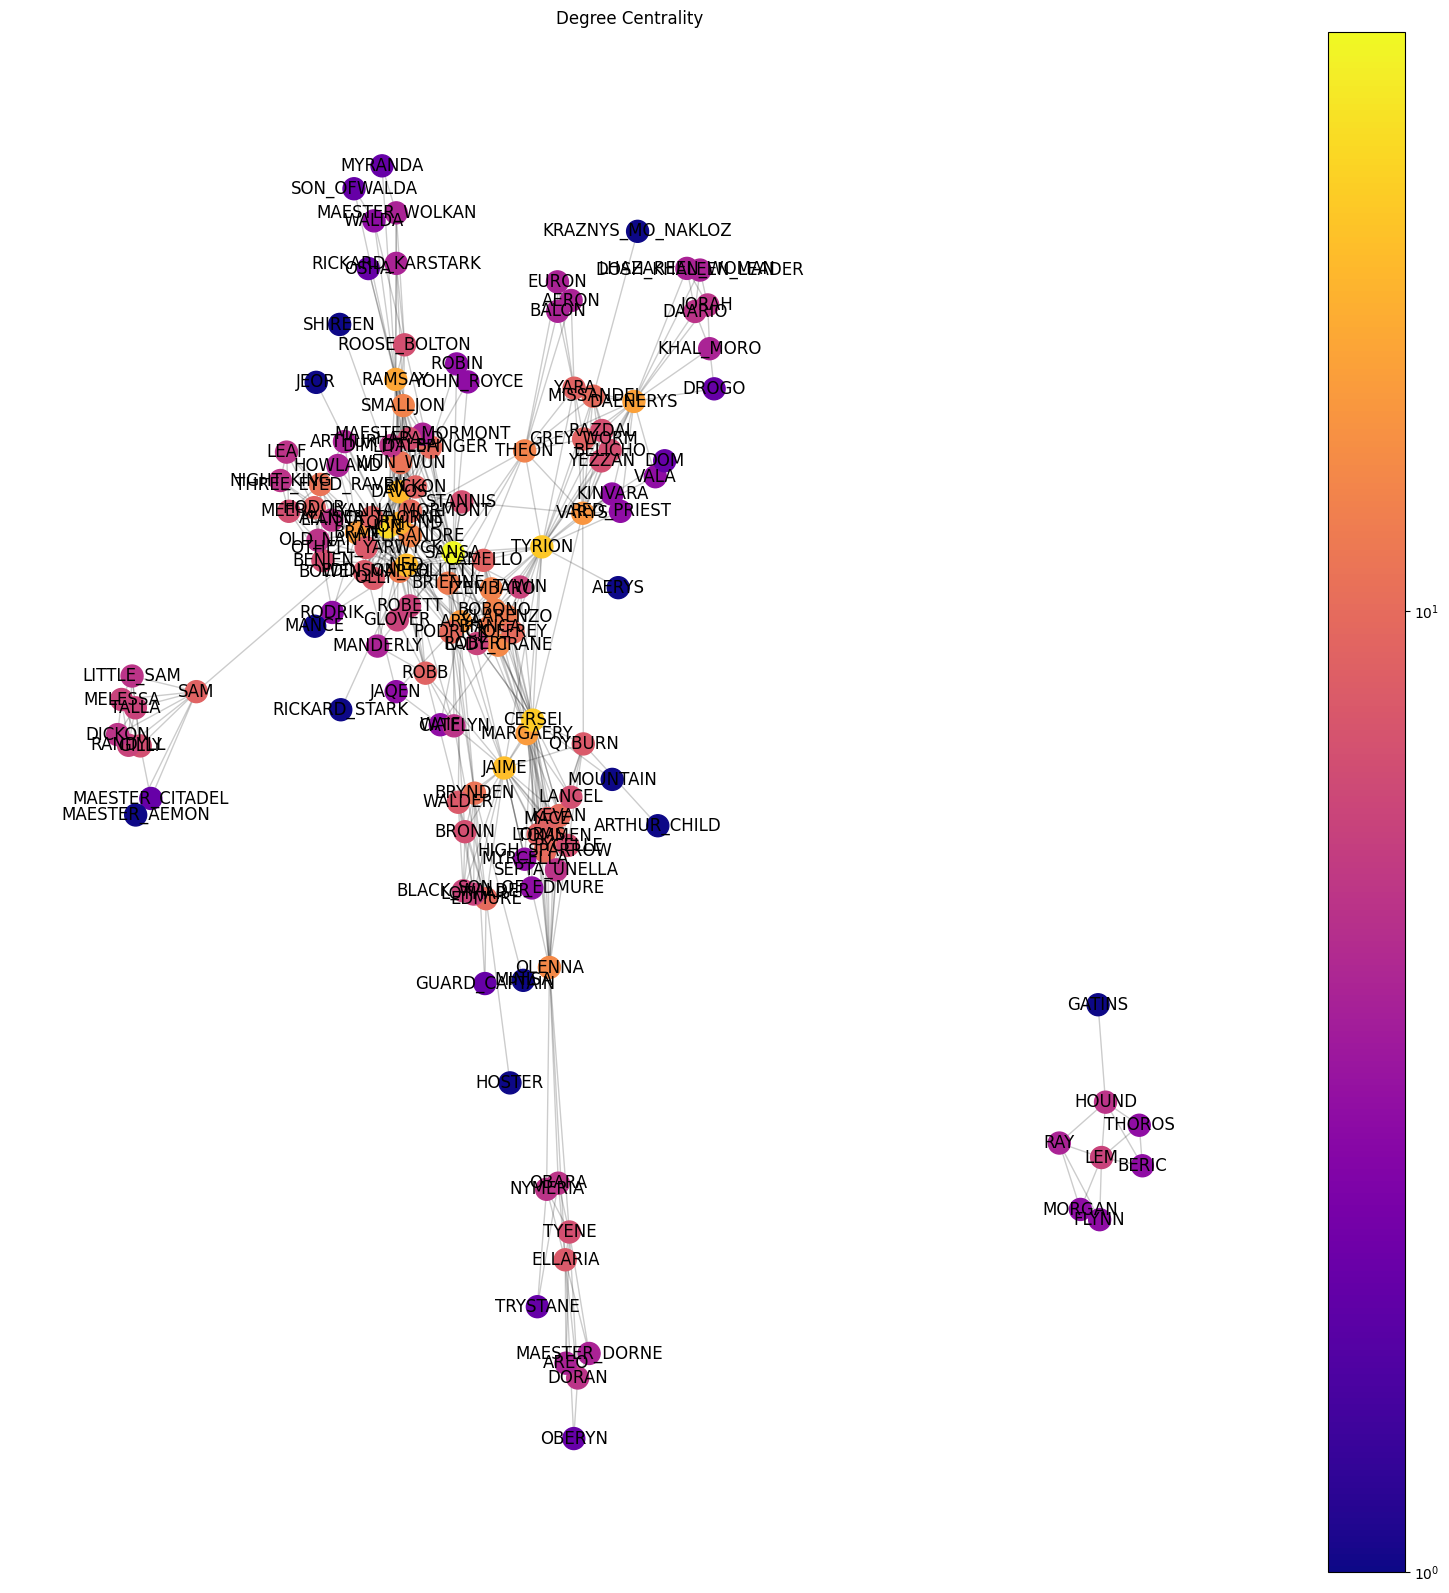

In [ ]:
draw_net(g, pos, degrees, 'Degree Centrality')
# Графыг "Degree Centrality" үзүүлэлтээр дүрслэнэ.

### Closeness Centrality

In [ ]:
closeness = nx.closeness_centrality(g)
# Граф дахь бүх тоосны closeness centrality-г тооцоолно.

In [ ]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
# Үзүүлэлтийн утгуудыг буурах дарааллаар эрэмбэлнэ.
ranks[0:5]  # Хамгийн өндөр closeness centrality бүхий 5 тоосыг үзүүлнэ.

[('SANSA', 0.48437799501629286),
 ('TYRION', 0.4296366462644516),
 ('JON', 0.4238307456392563),
 ('CERSEI', 0.4181796690307329),
 ('JAIME', 0.4140392762680523)]

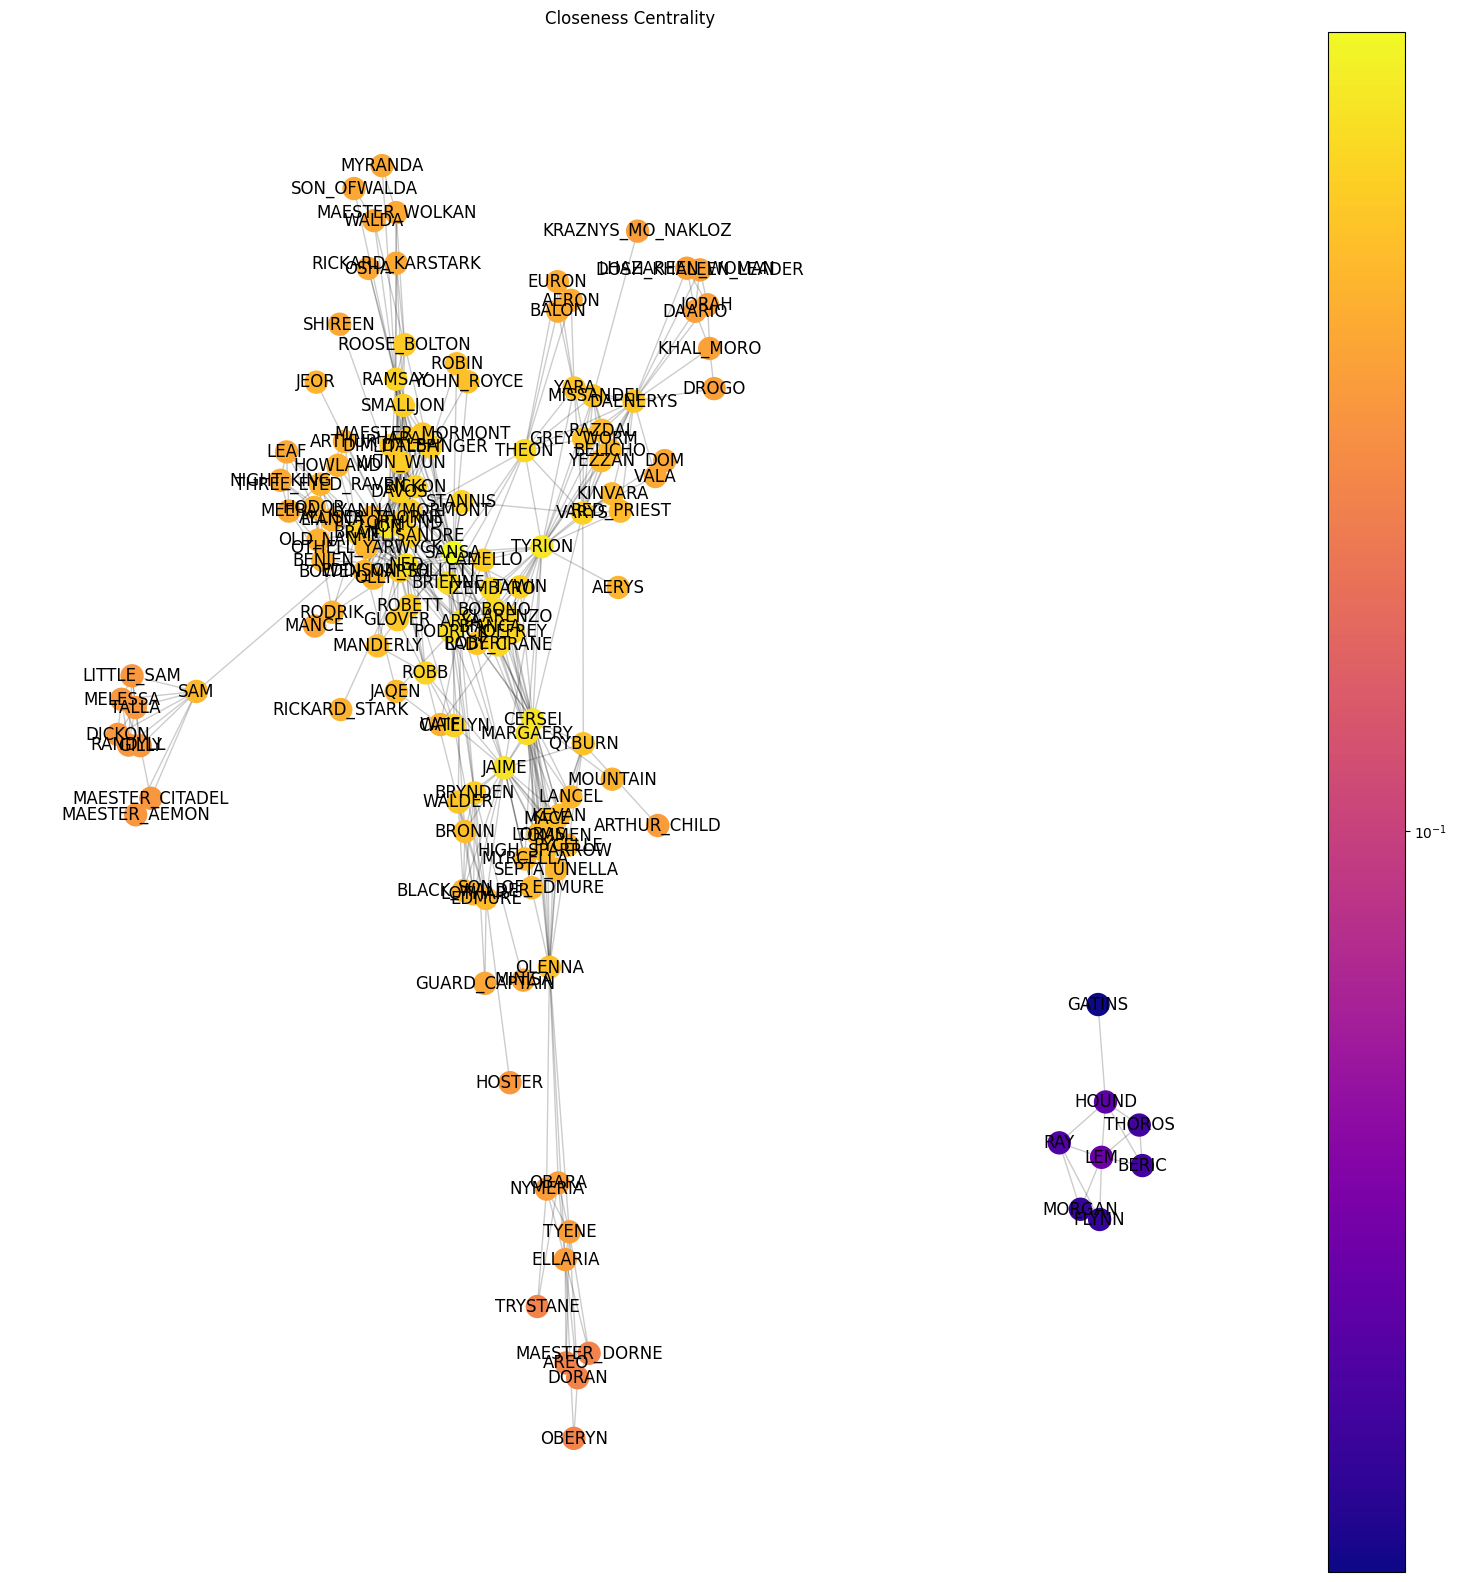

In [ ]:
draw_net(g, pos, closeness, 'Closeness Centrality')
# "Closeness Centrality" үзүүлэлтээр графыг дүрслэнэ.

### Betweenness Centrality

In [ ]:
betweenness = nx.betweenness_centrality(g)
# Граф дахь бүх тоосны betweenness centrality-г тооцоолно.

In [ ]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
# Betweenness утгуудыг буурах дарааллаар эрэмбэлнэ.
ranks[0:5]  # Хамгийн их betweenness centrality бүхий 5 тоосыг үзүүлнэ.

[('SANSA', 0.2626236959730493),
 ('JON', 0.19134542283724257),
 ('TYRION', 0.14853156113828941),
 ('JAIME', 0.13044955131298),
 ('CERSEI', 0.11721858119776944)]

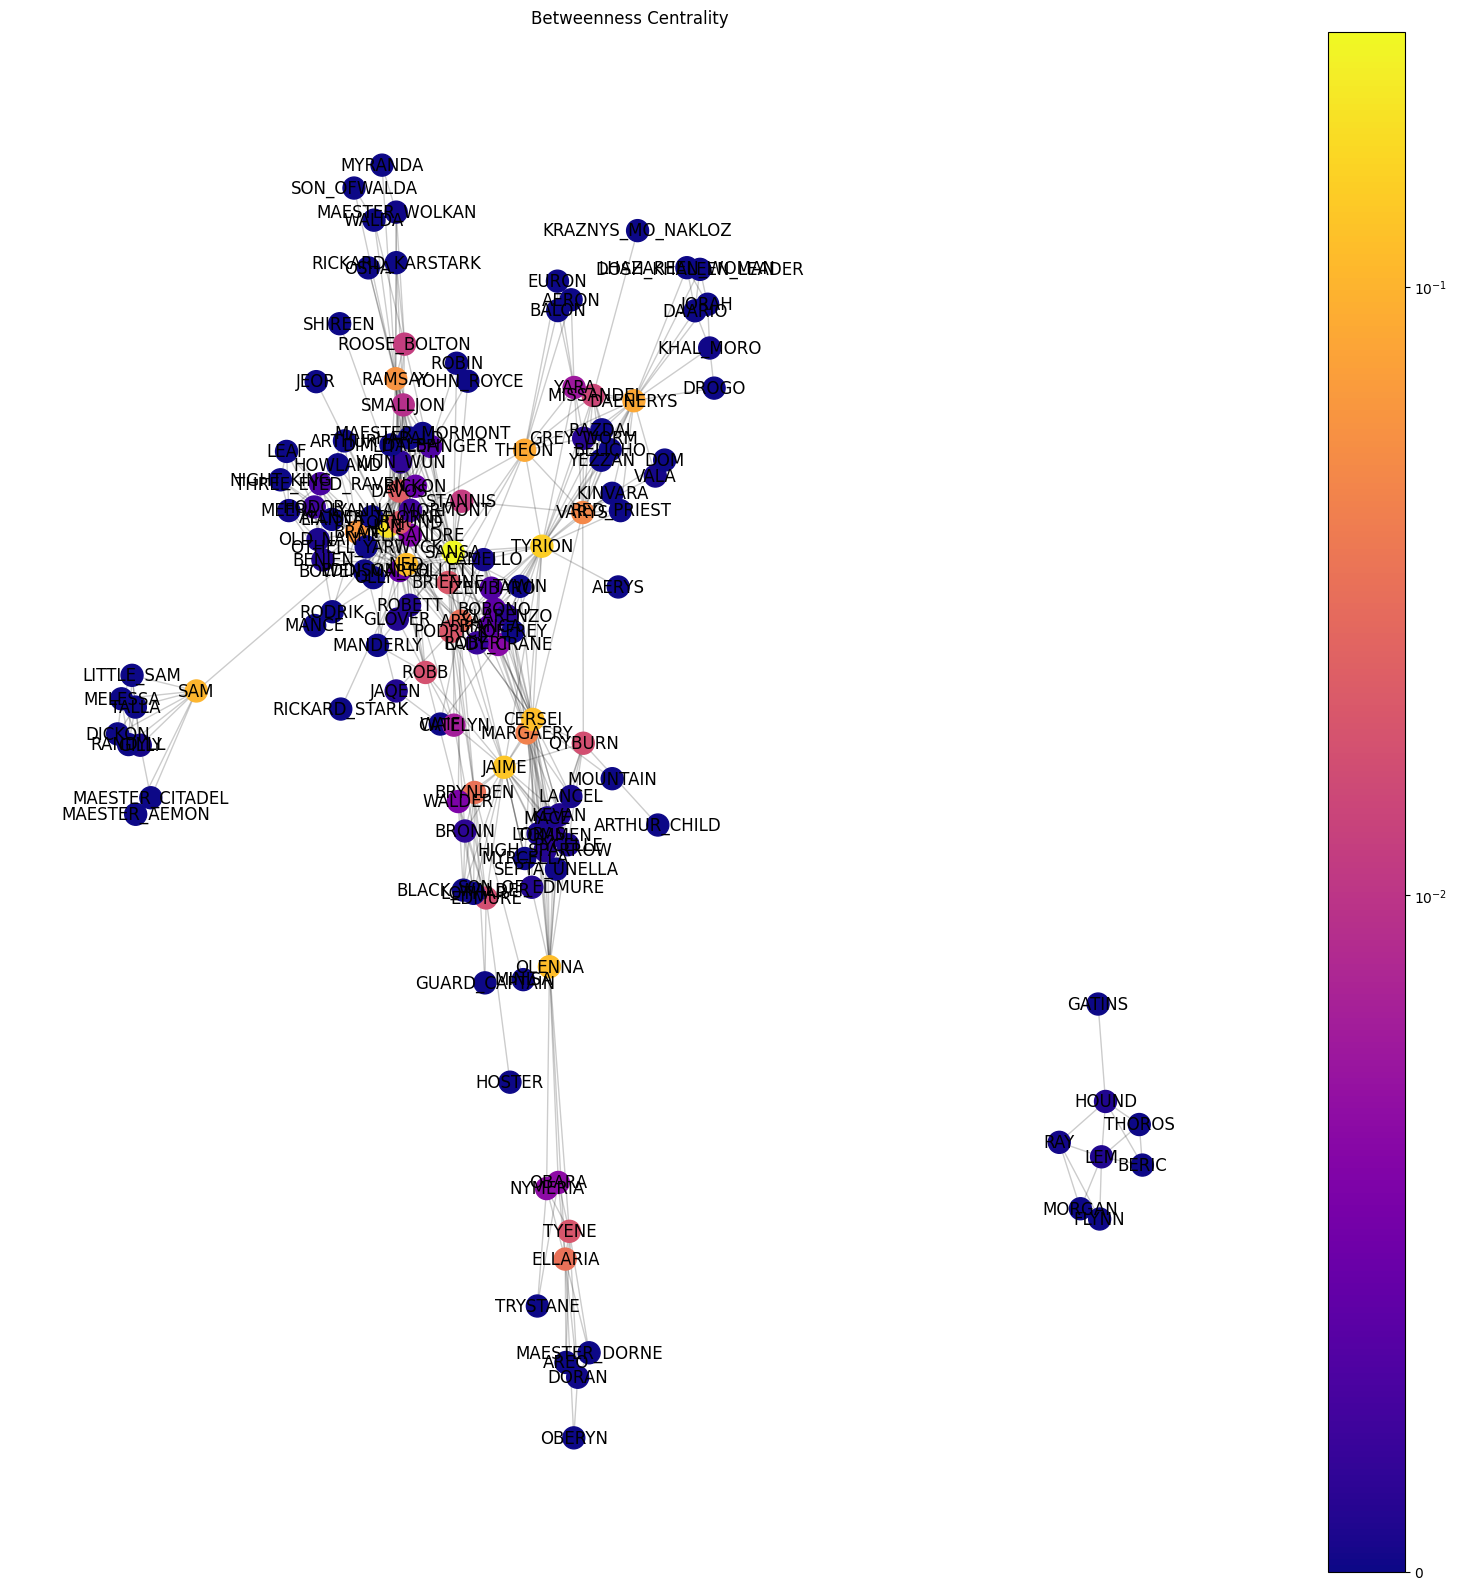

In [ ]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')
# "Betweenness Centrality" үзүүлэлтээр графыг дүрслэнэ.

### Harmonic Centrality

In [ ]:
harmonic = nx.harmonic_centrality(g)
# Граф дахь бүх тоосны harmonic centrality-г тооцоолно.

In [ ]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
# Harmonic утгуудыг буурах дарааллаар эрэмбэлнэ.
ranks[0:5]  # Хамгийн өндөр harmonic centrality бүхий 5 тоосыг үзүүлнэ.

[('SANSA', 81.41666666666664),
 ('JON', 73.33333333333333),
 ('TYRION', 71.91666666666669),
 ('CERSEI', 70.50000000000001),
 ('JAIME', 69.0)]

In [ ]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')
# "Harmonic Centrality" үзүүлэлтээр графыг дүрслэнэ.


### PageRank

In [ ]:
pagerank = nx.pagerank(g)
# Граф дахь бүх тоосны PageRank утгыг тооцоолно.

In [ ]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
# PageRank утгуудыг буурах дарааллаар эрэмбэлнэ.
ranks[0:5]  # Хамгийн өндөр PageRank бүхий 5 тоосыг үзүүлнэ.

[('SANSA', 0.028391061534083675),
 ('JON', 0.023390907243602793),
 ('CERSEI', 0.020278587723368137),
 ('TYRION', 0.02018889875063729),
 ('JAIME', 0.018551927013827622)]

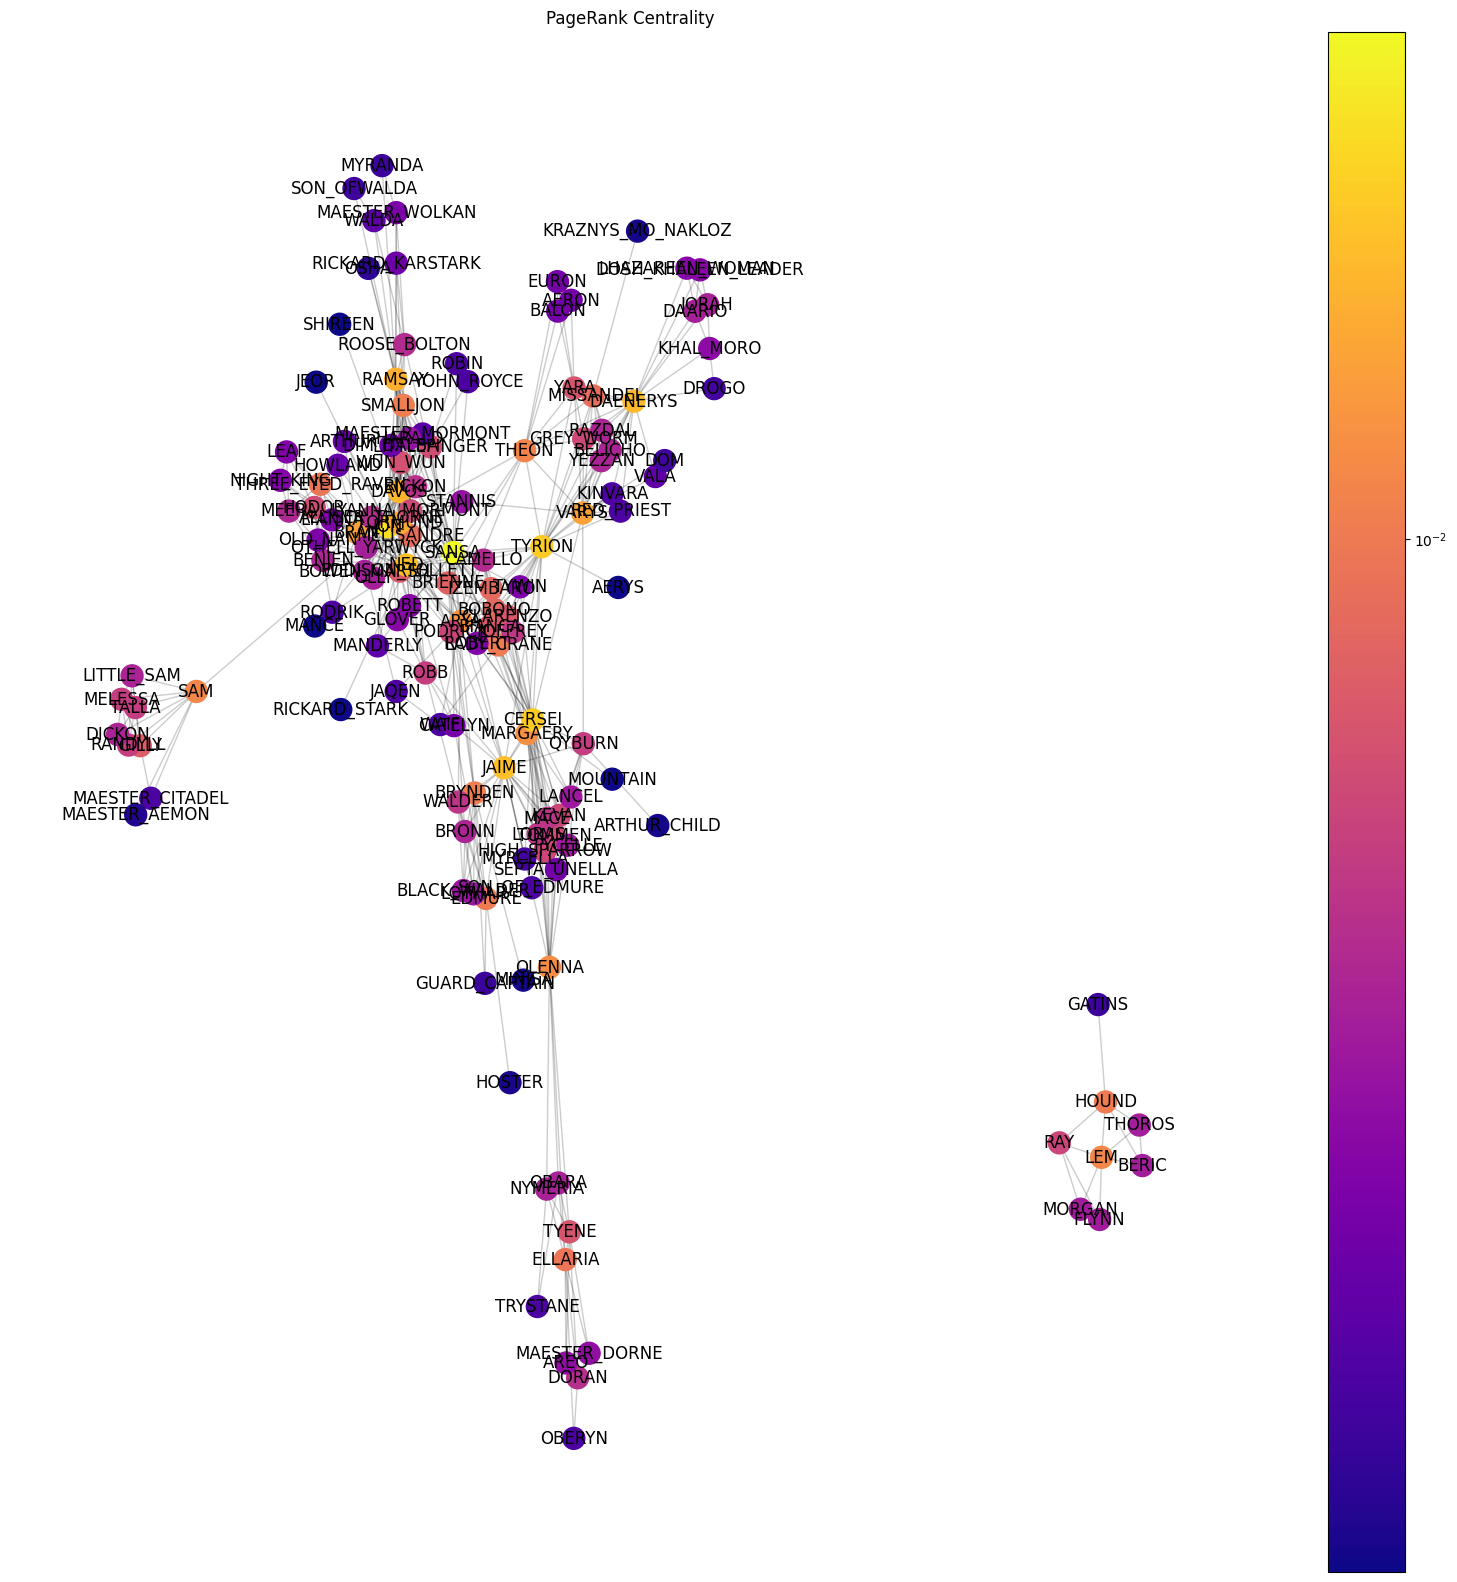

In [ ]:
draw_net(g, pos, pagerank, 'PageRank Centrality')
# "PageRank Centrality" үзүүлэлтээр графыг дүрслэнэ.

### Eigenvector Centrality
Ax = λx

In [ ]:
eigen = nx.eigenvector_centrality(g)
# Граф дахь бүх тоосны eigenvector centrality-г тооцоолно.

In [ ]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
# Eigenvector утгуудыг буурах дарааллаар эрэмбэлнэ.
ranks[0:5]  # Хамгийн өндөр eigenvector centrality бүхий 5 тоосыг үзүүлнэ.

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

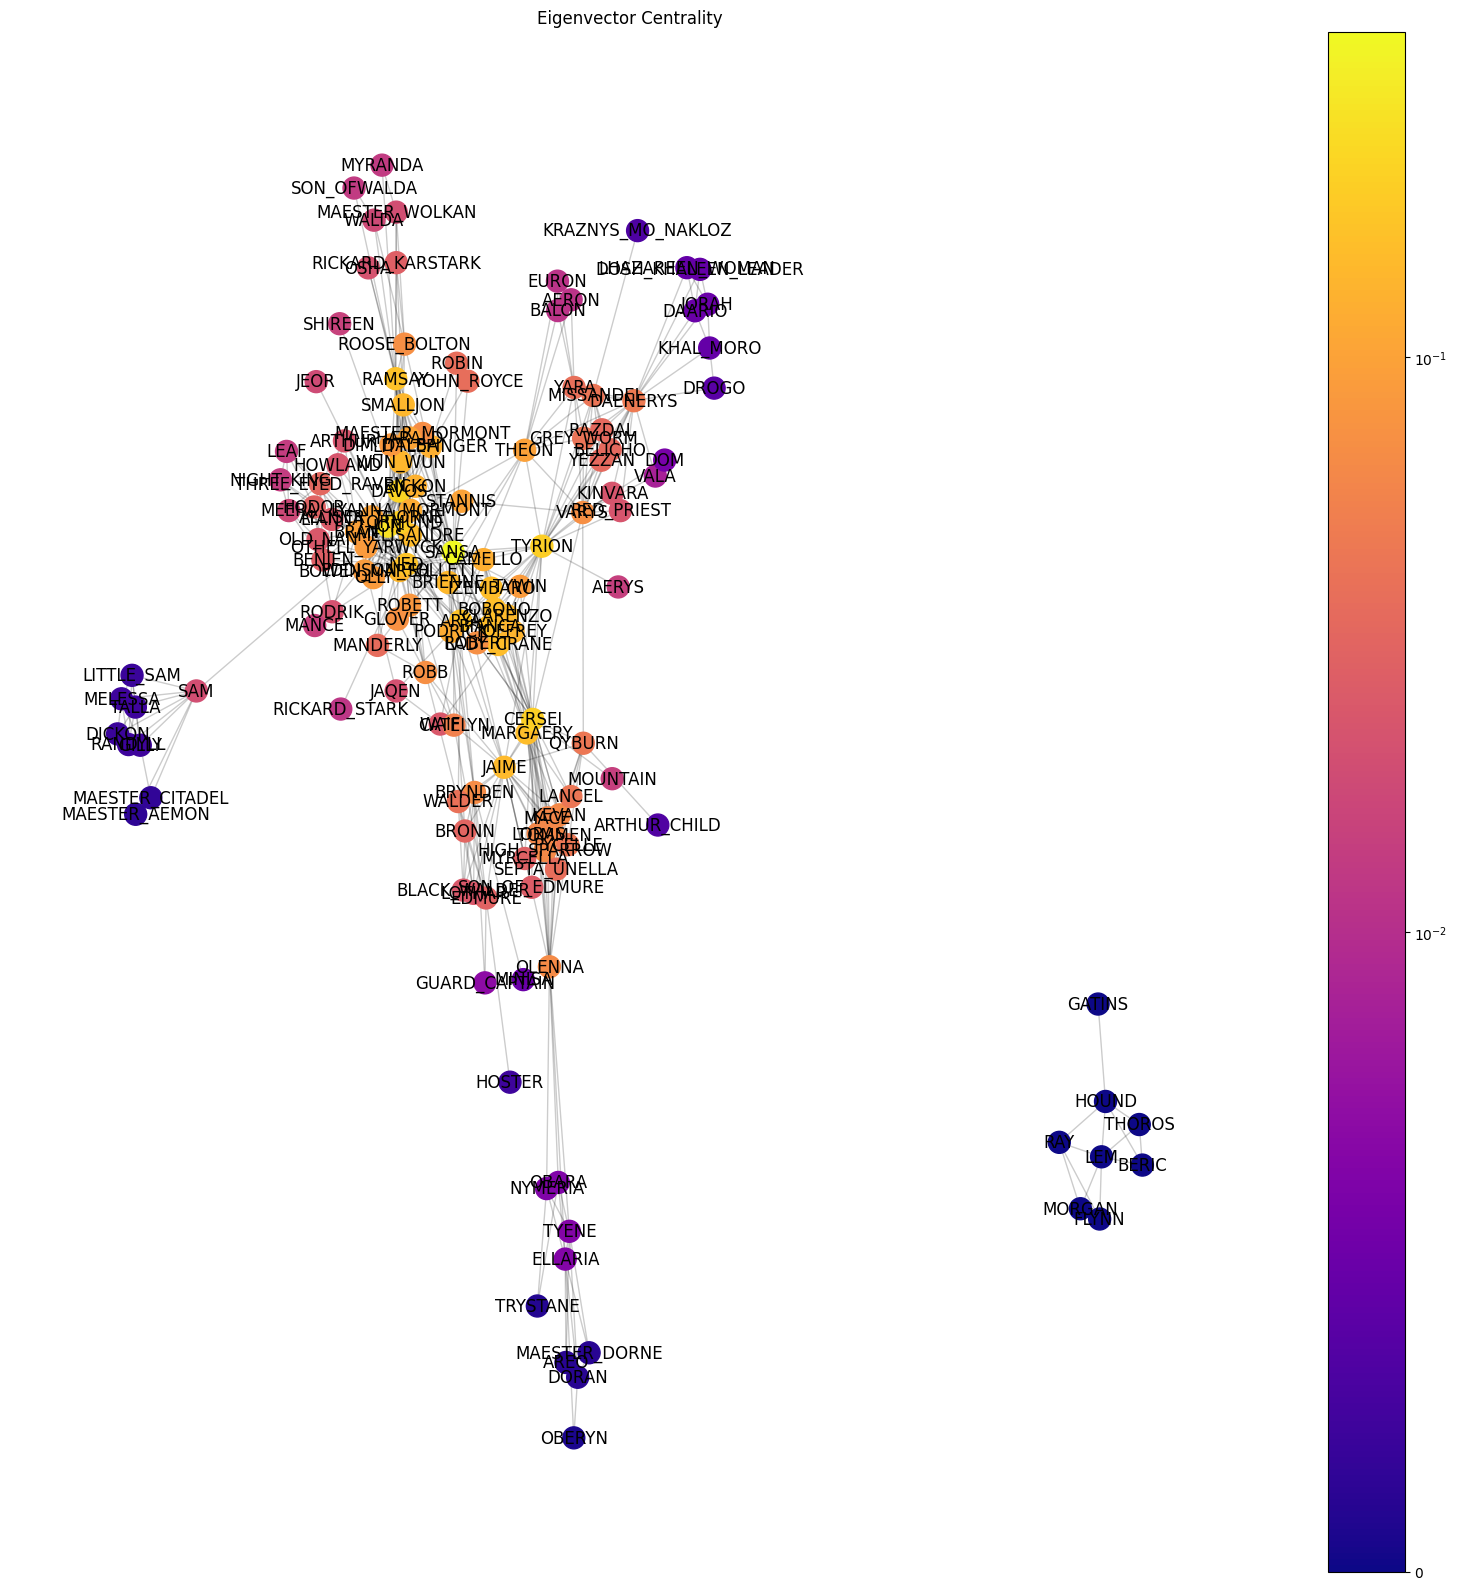

In [ ]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')
# "Eigenvector Centrality" үзүүлэлтээр графыг дүрслэнэ.

### Assortative Mixing

Newman's Assortativity
Quantify homophily while scalar node properties are involved (e.g., degree)
Degree assortative
Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)
Degree disassortative
Nodes tends to connect in a star-like topology

In [ ]:
r = nx.degree_assortativity_coefficient(g)
# Граф дахь тооснуудын холболт дахь ижил төстэй байдлыг (assortativity) хэмжих коэффициентыг тооцоолно.

In [ ]:
# Суулгах команд: networkx санг суулгах (pip install networkx)
!pip install networkx

DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import networkx as nx
knn = nx.average_neighbor_degree(g)
# Бүх тоосны ойролцоо тооснуудын degree-ын дундаж утгыг тооцоолно.
knn = dict(sorted(knn.items()))
# Үр дүнг dictionary болгон эрэмбэлж хадгалах.

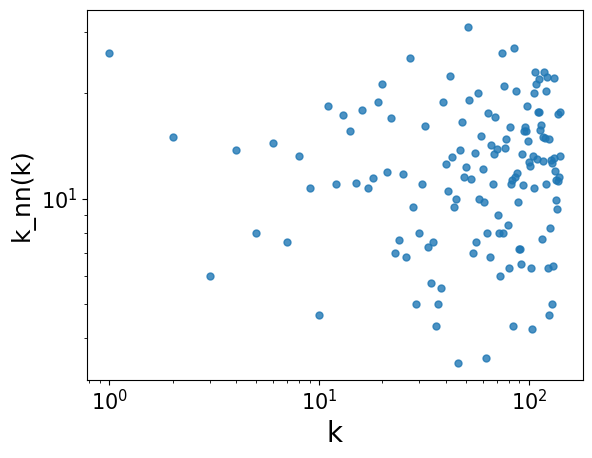

In [ ]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
# k (тоосны degree) болон k_nn (ойролцооны дундаж degree)-г цэгөөр дүрслэнэ.
plt.loglog()                   # Log-log диаграмм дүрслэнэ.
plt.xlabel("k", fontsize=20)    # x тэнхлэгийн шошгыг тохируулна.
plt.ylabel("k_nn(k)", fontsize=18)  # y тэнхлэгийн шошгыг тохируулна.
plt.xticks(fontsize=15)         # x axis-ийн тэмдэглэгээний хэмжээг тохируулна.
plt.yticks(fontsize=15)         # y axis-ийн тэмдэглэгээний хэмжээг тохируулна.
plt.show()                    # Диаграммыг харуулна.

In [ ]:
degree_assortativity = nx.degree_assortativity_coefficient(g)
# Граф дахь тооснуудын degree assortativity-г дахин тооцоолно.
degree_assortativity
# Ассортативити (ийлчлэл) коэффициентыг харуулна.

-0.006283179316286868

### Node (local) Assortativity measures

In [ ]:
!pip install node_conformity
# node_conformity санг суулгах команд.

  Using cached node_conformity-0.0.2-py3-none-any.whl.metadata (815 bytes)
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
gcc = sorted(nx.connected_components(g), key=len, reverse=True)
# Граф дахь холболт бүхий компонентуудыг (байршлын бүлгүүдийг) ихээс бага рүү эрэмбэлнэ.
h0 = g.subgraph(gcc[0])
# Хамгийн том холболт бүхий (нэгтгэгдсэн) компонентыг сонгон авна.

# 'house' шинж чанарт тулгуурласан conformity-г тооцоолох:
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # decay хүчин зүйлсийн жагсаалт.
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)
# Гол компонент дээр 'house' шинж чанарт тулгуурласан conformity-г олон decay хүчин зүйлээр тооцоолно.

100%|██████████| 134/134 [00:00<00:00, 344.94it/s]


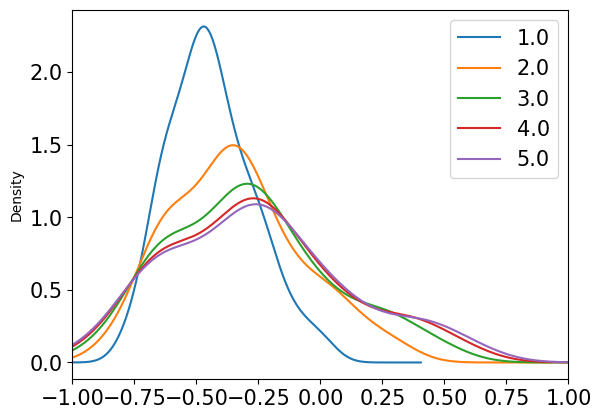

In [ ]:
_, ax = plt.subplots()
# Шинээр зураг ба axis үүсгэнэ.
for alpha, profiles in res.items():
    # Өгөгдөл доторх decay хүчин зүйл (alpha) болон түүнтэй холбоотой профайл мэдээллийг давталт хийх.
    for profile, data in profiles.items():
        # Profile буюу тодорхой шинж чанарт холбогдсон өгөгдлийг авч, DataFrame болгон хөрвүүлэх.
        df = pd.DataFrame(list(data.values()), columns=[alpha])
        df.plot.kde(ax=ax)  # DataFrame дээр Kernel Density Estimation график дүрслэнэ.

plt.xticks(fontsize=15)  # x axis-ийн тэмдэглэгээний хэмжээг тохируулна.
plt.yticks(fontsize=15)  # y axis-ийн тэмдэглэгээний хэмжээг тохируулна.
plt.xlim((-1,1))         # x axis-ийн утгын хязгаарыг -1 хүртэл 1 хүртэл тогтооно.
plt.legend(fontsize=15)    # Легендийн тэмдэглэгээний хэмжээг тохируулна.
plt.show()                 # График дүрслэлийг харуулна.

In [ ]:
conf_a3 = res['3.0']['house']
# decay хүчин зүйл 3.0-д зориулсан 'house' шинж чанарт тулгуурласан conformity-г сонгон авна.

In [ ]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]
# Тооснуудыг conformity буюу node assortativity утгаас багаас их рүү эрэмбэлнэ.

In [ ]:
# Хамгийн бага node assortativity утгатай 5 тоосыг хэвлэнэ.
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{g.nodes[nd[0]]['house']: >20}")

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.7788744743174569	             Citadel


In [ ]:
# Хамгийн их node assortativity утгатай 5 тоосыг хэвлэнэ.
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{g.nodes[nd[0]]['house']: >20}")

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.35029228837385407	               Stark
               WALDA	0.33535527594258246	              Bolton


In [ ]:
na = {c[0]: c[1] for c in node_assortativity}
# node assortativity-г dictionary болгон хөрвүүлнэ.

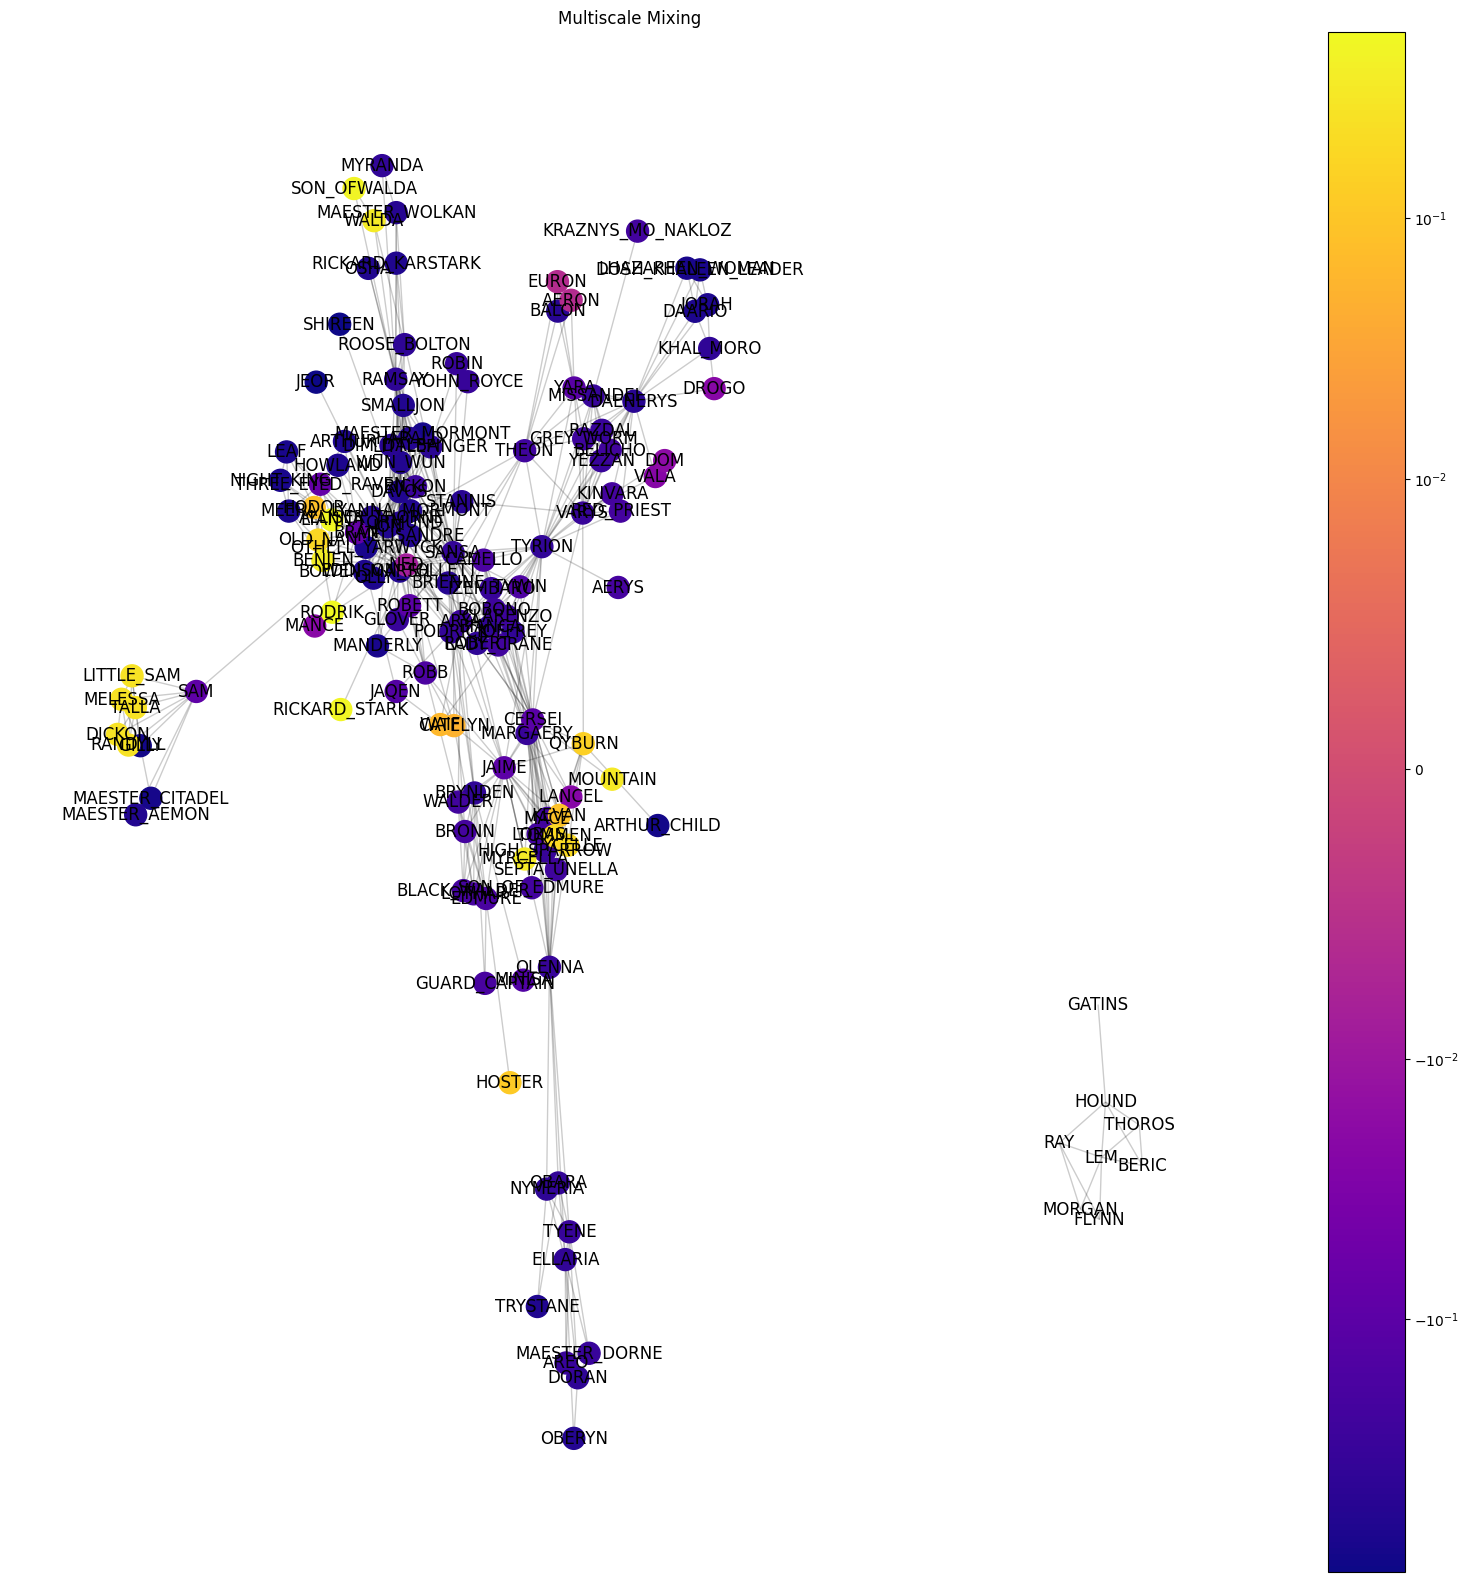

In [ ]:
draw_net(g, pos, na, "Multiscale Mixing")
# "Multiscale Mixing" нэртэй үзүүлэлтээр графыг дүрслэнэ.

In [ ]:
import networkx as nx
# networkx санг импортлон граф үүсгэх, анализ хийхэд ашиглана.

# Undirected граф үүсгэх
G = nx.Graph()
# Чиглээгүй (undirected) граф үүсгэнэ.
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
# Граф дахь эгшиг (edge)-үүдийн жагсаалтыг тодорхойлно.
G.add_edges_from(edges)
# Жагсаалтад байгаа бүх эгшигүүдийг графд нэмнэ.

In [ ]:
# Degree Centrality-ийг тооцоолох
degree_centrality = nx.degree_centrality(G)
# Граф дахь тоос бүрийн degree centrality-г тооцоолно.
print("Degree Centrality for Undirected Graph:")
# Чиглээгүй граф дахь degree centrality-г хэвлэнэ.
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")
    # Бүх тоос болон тэдгээрийн degree centrality-г нэг мөрөөр хэвлэнэ.


Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25


In [ ]:
import networkx as nx
# networkx-г дахин импортлон Directed граф үүсгэхэд ашиглана (энэ мөр нь давхардсан боловч зөвхөн ойлголтын төлөө).

# Directed граф үүсгэх
DG = nx.DiGraph()
# Чиглэсэн (directed) граф үүсгэнэ.
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
# Directed графын эгшиг (edge)-үүдийн жагсаалтыг тодорхойлно.
DG.add_edges_from(edges)
# Directed графд эгшигүүдийг нэмнэ.

In [ ]:
print("\nIn-Degree Centrality for Directed Graph:")
# Directed графын in-degree (ирсэн холболтын тоо) centrality-г хэвлэнэ гэж зорилсон хэсэг.
for node, centrality in in_degree_centrality.items():
    # in_degree_centrality гэдэг dictionary-д түлхүүр бол тоос, утга нь тухайн тоосны in-degree centrality.
    print(f"Node {node}: {centrality}")

print("\nOut-Degree Centrality for Directed Graph:")
# Directed графын out-degree (гарсан холболтын тоо) centrality-г хэвлэх хэсэг.
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")


In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0


In [ ]:
import networkx as nx
# networkx-г дахин импортлоно.
import pandas as pd
# pandas санг импортлон өгөгдлийг унших, боловсруулхад ашиглана.

# Directed граф үүсгэх pandas DataFrame-оос
df = pd.read_csv("twitter_network.csv", header=None, names=["source", "target"])
# Файлыг дахин уншиж, толгой мөргүйгээр ("header=None") 'source' ба 'target' гэсэн нэртэй багануудтай DataFrame үүсгэнэ.
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())
# DataFrame-д байгаа 'source' ба 'target' багануудыг ашиглан Directed граф үүсгэнэ.


KeyError: 'source'

In [ ]:
# Degree Centrality-ийг тооцоолох
degree_centrality = nx.degree_centrality(G)
# Directed граф дахь бүх тоосны degree centrality-г тооцоолно.

# Top influencers буюу хамгийн өндөр degree centrality-тай 10 хэрэглэгчийг олж эрэмбэлэх
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
# degree_centrality-г утгын дагуу буурах дарааллаар эрэмбэлж, эхний 10 элементийг (хамгийн өндөр утгатай) авч байна.

print("\nTop 10 Influencers based on Degree Centrality:")
# Топ 10 нөлөө бүхий хэрэглэгчийг хэвлэх хэсэг.
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")
    # Хэрэглэгч (тоос)-ын дугаар болон тэдгээрийн degree centrality-г нэг мөрөөр хэвлэнэ.


Top 10 Influencers based on Degree Centrality:
User 2: 0.75
User 3: 0.75
User 4: 0.75
User 1: 0.5
User 5: 0.25
